<h1>SVM model on RGB to predict Power Usage

In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv("marlin_default_br255_n2197_ver2.csv")

In [10]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
data.apply(pd.to_numeric, errors='ignore')

,red,green,blue,power
0,0,0,0,225.123353
1,0,0,33,269.932358
2,0,0,66,311.378898
3,0,0,89,352.164219
4,0,0,124,430.439973
5,0,0,149,519.143817
6,0,0,170,620.017690
7,0,0,188,709.111170
8,0,0,203,782.131010
9,0,0,218,894.658352


<h1>SVM model

In [13]:
data['red'] = data['red']/255
data['green'] = data['green']/255
data['blue'] = data['blue']/255
data['power'] = data['power'] - data['power'][0]
X = data[['red','green','blue']].values
Y = data['power'].values

In [14]:
from sklearn import svm

clf = svm.SVR(kernel='rbf', C = 100, gamma=10)
clf.fit(X,Y)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h1>Model Saving</h1>
<h3>For uploading on FLASK

In [22]:
import pickle
from sklearn.externals import joblib

joblib.dump(clf, 'power_svm.pkl') 

['power_svm.pkl',
 'power_svm.pkl_01.npy',
 'power_svm.pkl_02.npy',
 'power_svm.pkl_03.npy',
 'power_svm.pkl_04.npy',
 'power_svm.pkl_05.npy',
 'power_svm.pkl_06.npy',
 'power_svm.pkl_07.npy',
 'power_svm.pkl_08.npy',
 'power_svm.pkl_09.npy',
 'power_svm.pkl_10.npy']

In [23]:
clf.predict([[19/255,19/255,17/255]])

array([ 453.21176892])

<h1> Select Row using specific Column value

In [15]:
RED = data.loc[(data['green'] == 0) & (data['blue'] == 0)]
GREEN = data.loc[(data['red'] == 0) & (data['blue'] == 0)]
BLUE = data.loc[(data['green'] == 0) & (data['red'] == 0)]
Black = data.loc[(data['red'] == 0) & (data['green'] == 0) & (data['blue'] == 0)]

In [16]:
Black

,red,green,blue,power
0,0.0,0.0,0.0,0.0


In [17]:
RED

,red,green,blue,power
0,0.000000,0.0,0.0,0.000000
169,0.129412,0.0,0.0,40.758064
338,0.258824,0.0,0.0,690.221535
507,0.349020,0.0,0.0,86.104097
676,0.486275,0.0,0.0,130.403905
845,0.584314,0.0,0.0,183.903884
1014,0.666667,0.0,0.0,241.421876
1183,0.737255,0.0,0.0,294.993389
1352,0.796078,0.0,0.0,356.175073
1521,0.854902,0.0,0.0,1053.857539


In [18]:
GREEN

,red,green,blue,power
0,0.0,0.000000,0.0,0.000000
13,0.0,0.129412,0.0,10.695906
26,0.0,0.258824,0.0,30.050402
39,0.0,0.349020,0.0,49.404899
52,0.0,0.486275,0.0,99.828455
65,0.0,0.584314,0.0,147.738338
78,0.0,0.666667,0.0,210.900701
91,0.0,0.737255,0.0,332.575558
104,0.0,0.796078,0.0,394.384873
117,0.0,0.854902,0.0,378.538096


In [19]:
BLUE

,red,green,blue,power
0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.129412,44.809005
2,0.0,0.0,0.258824,86.255545
3,0.0,0.0,0.349020,127.040866
4,0.0,0.0,0.486275,205.316620
5,0.0,0.0,0.584314,294.020464
6,0.0,0.0,0.666667,394.894337
7,0.0,0.0,0.737255,483.987817
8,0.0,0.0,0.796078,557.007657
9,0.0,0.0,0.854902,669.534999


In [20]:
Blue = data.loc[(data['red'] == 0) & (data['green'] == 0)]
Red = data.loc[(data['blue'] == 0) & (data['green'] == 0)]
Green = data.loc[(data['blue'] == 0) & (data['red'] == 0)]

In [21]:
red_X = Red['red'].values.reshape(-1,1)
red_Y = Red['power'].values
red = svm.SVR('linear')
red.fit(red_X,red_Y)

green_X = Green['green'].values.reshape(-1,1)
green_Y = Green['power'].values
green = svm.SVR(kernel='rbf')
green.fit(green_X,green_Y)

blue_X = Blue['blue'].values.reshape(-1,1)
blue_Y = Blue['power'].values
blue = svm.SVR(kernel='rbf')
blue.fit(blue_X,blue_Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h1>Pyplot Example

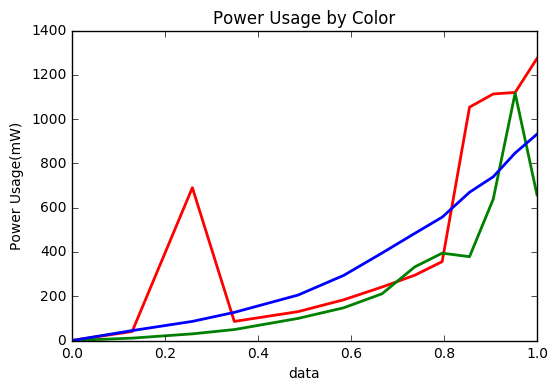

In [22]:
import matplotlib.pyplot as plt

plt.plot(red_X, red_Y, color='red', lw=2, label='R')
plt.plot(green_X, green_Y, color='green', lw=2, label='G')
plt.plot(blue_X, blue_Y, color='blue', lw=2, label='B')
plt.title("Power Usage by Color")
plt.xlabel("data")
plt.ylabel("Power Usage(mW)")
plt.xlim([0,1])
plt.show()

<h1>Accuracy Test</h1>
<h3>Train set and Test set Split</h3>

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib

score = []
train, test = train_test_split(data, test_size=0.1)
train_X = train[['red','green','blue']].values
train_Y = train['power'].values
test_X = test[['red','green','blue']].values
test_Y = test['power'].values

train_model = joblib.load('power_svm.pkl')

train_pred = train_model.predict(train_X)
test_pred = train_model.predict(test_X)

avg = 0
for x in score:
    avg = avg + x
avg = avg

In [24]:
from sklearn.metrics import explained_variance_score

explained_variance_score(test_Y, test_pred)

0.51784121260156057

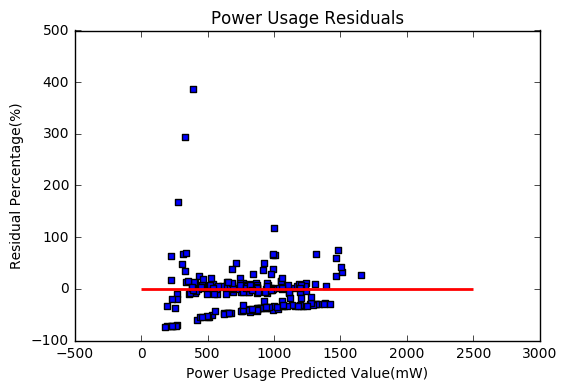

In [25]:
#plt.scatter(train_pred,(train_pred-train_Y)/train_Y*100, c='blue',marker='o',label='Training data')
plt.scatter(test_pred,(test_pred-test_Y)/test_Y*100, c='blue',marker='s',label='Test data')
plt.title('Power Usage Residuals')
plt.xlabel('Power Usage Predicted Value(mW)')
plt.ylabel('Residual Percentage(%)')
plt.hlines(y=0, xmin=0, xmax=2500, lw=2,color='red')
plt.show()

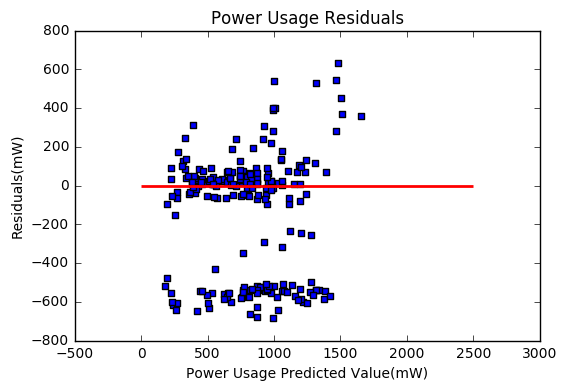

In [26]:
#plt.scatter(train_pred,train_pred-train_Y, c='blue',marker='o',label='Training data')
plt.scatter(test_pred,test_pred-test_Y, c='blue',marker='s',label='Test data')
plt.title('Power Usage Residuals')
plt.xlabel('Power Usage Predicted Value(mW)')
plt.ylabel('Residuals(mW)')
plt.hlines(y=0, xmin=0, xmax=2500, lw=2,color='red')
plt.show()

<h1>Real Image Testing

In [27]:
from PIL import Image

filename = 'Lenna.png'

im = Image.open(filename, 'r') #image that has lots of color 
# im = Image.open('City.jpg', 'r') # image that has lots of black
x, y = im.size
if y > x:
    im = im.rotate(90)
if x >= 64 and y >= 36:
    x_delta=64
    y_delta=36
else:
    x_delta=x
    y_delta=y
counting_pixels = (x_delta*y_delta) # will be 2304 for almost all resolutions
all_pixel = im.load()
x_offset = x//x_delta
y_offset = y//y_delta
pixels = []
for i in range(x_delta):
    for j in range(y_delta):
        pixels.append(all_pixel[(i+1)*x_offset-1,(j+1)*y_offset-1])
        #print((i+1)*x_offset-1,(j+1)*y_offset-1)

end_pixels = np.array(pixels)
end = pd.DataFrame(pixels)
end.rename(columns={0: 'R', 1: 'G', 2: 'B'}, inplace=True)

R, G, B = np.mean(end_pixels,axis=0)

In [19]:
R,G,B

(180.31119791666666, 99.490451388888886, 105.83376736111111)

In [20]:
clf.predict([[R/255,G/255,B/255]])[0] + 200

869.51973038889298